In [142]:
import warnings
warnings.filterwarnings("ignore")
import chardet
with open ('/Users/Ryu Seung Gwon/Library/CloudStorage/OneDrive-한양대학교/3-2/비즈니스애널리틱스개론/팀플/중간발표/SeoulBikeData.csv', mode='rb') as f:
    d = f.readline()
print(chardet.detect(d)) 

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv('/Users/Ryu Seung Gwon/Library/CloudStorage/OneDrive-한양대학교/3-2/비즈니스애널리틱스개론/팀플/중간발표/SeoulBikeData.csv',encoding='ISO-8859-1', low_memory=False)

# 1. Data Introduce

In [144]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [146]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [147]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [170]:
df['Holiday'] = df['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   int64  
 13  Functioning Day            8760 non-null   objec

# 2. Exploratroy Data Analysis, EDA

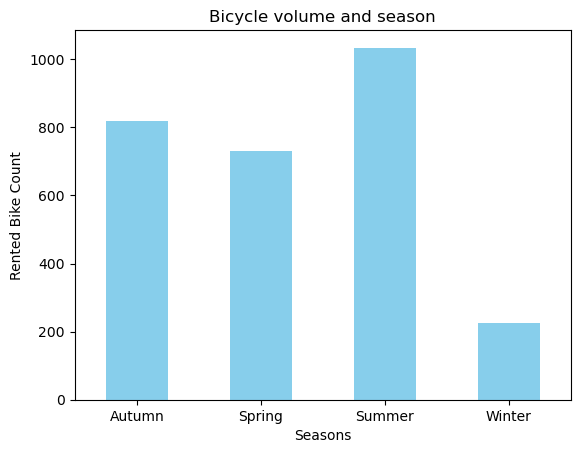

In [150]:
# Season
import pandas as pd
import matplotlib.pyplot as plt
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
seasonal_data = df.groupby('Seasons')['Rented Bike Count'].mean()

seasonal_data.plot(kind='bar', color='skyblue')
plt.title("Bicycle volume and season")
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=0)
plt.show()

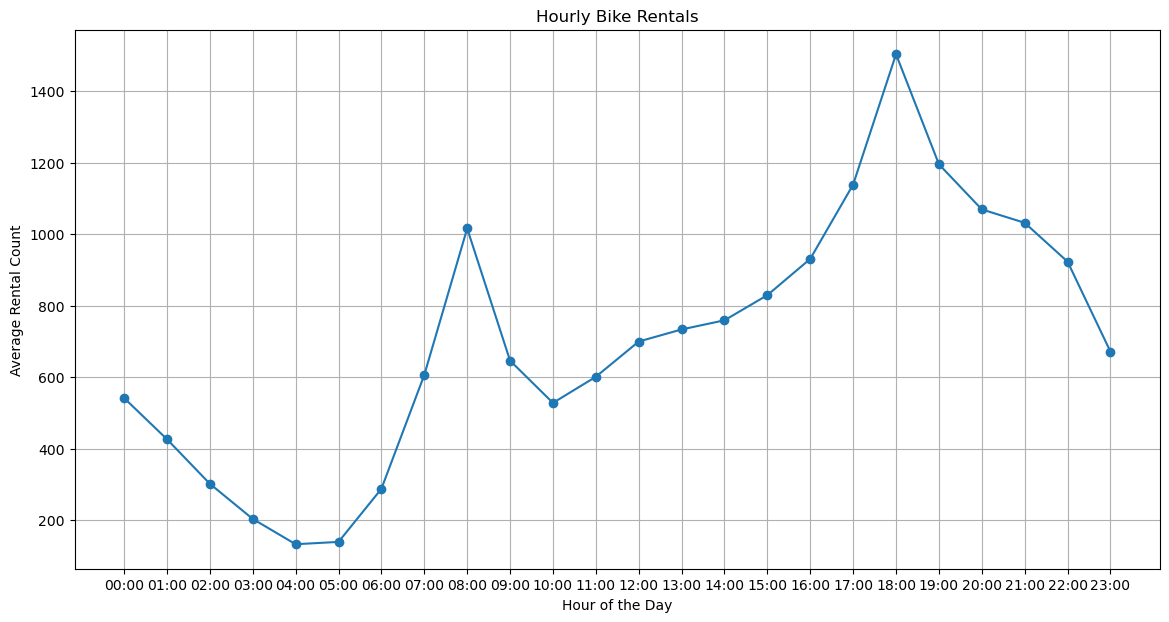

In [151]:
# Hour
import matplotlib.pyplot as plt
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize=(14, 7))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o')
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Count')
plt.grid(True)
plt.xticks(hourly_rentals.index)
plt.xticks(hourly_rentals.index, [f"{hour:02}:00" for hour in hourly_rentals.index])

plt.show()

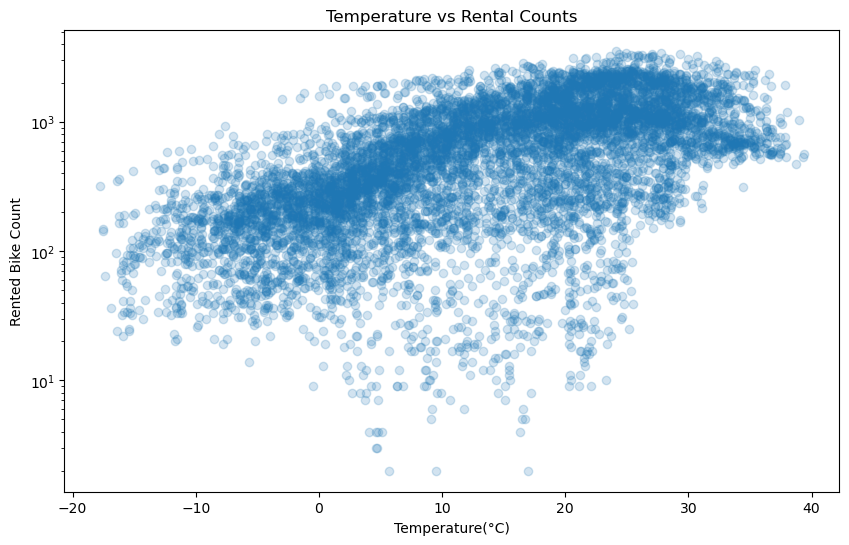

In [178]:
# Temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.2)
plt.yscale('log')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Temperature vs Rental Counts')
plt.show()

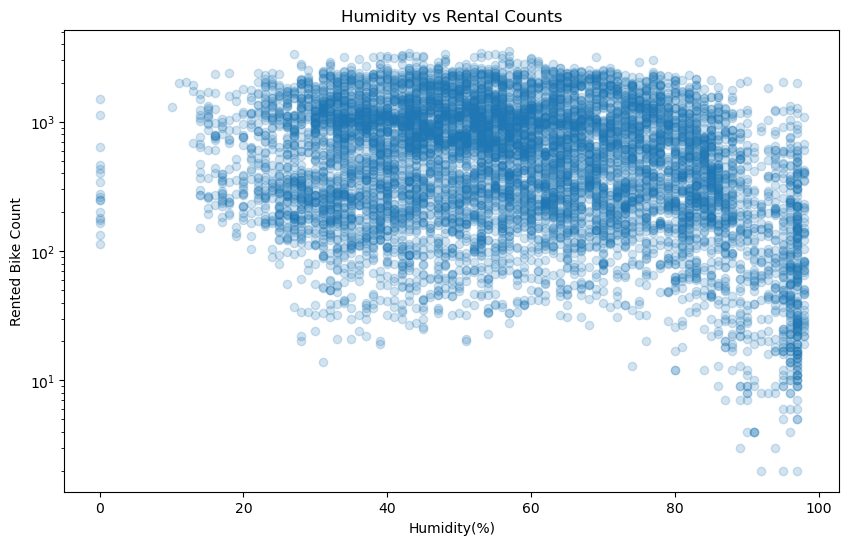

In [176]:
# Humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Humidity(%)'], df['Rented Bike Count'], alpha=0.2)
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.yscale('log')
plt.title('Humidity vs Rental Counts')
plt.show()

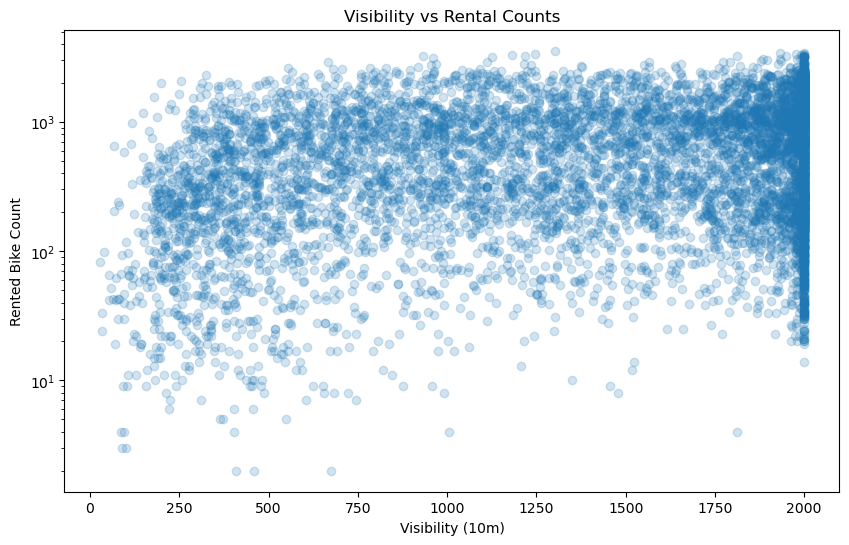

In [173]:
# Visibility
plt.figure(figsize=(10, 6))
plt.scatter(df['Visibility (10m)'], df['Rented Bike Count'], alpha=0.2)
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.yscale('log')
plt.title('Visibility vs Rental Counts')
plt.show()

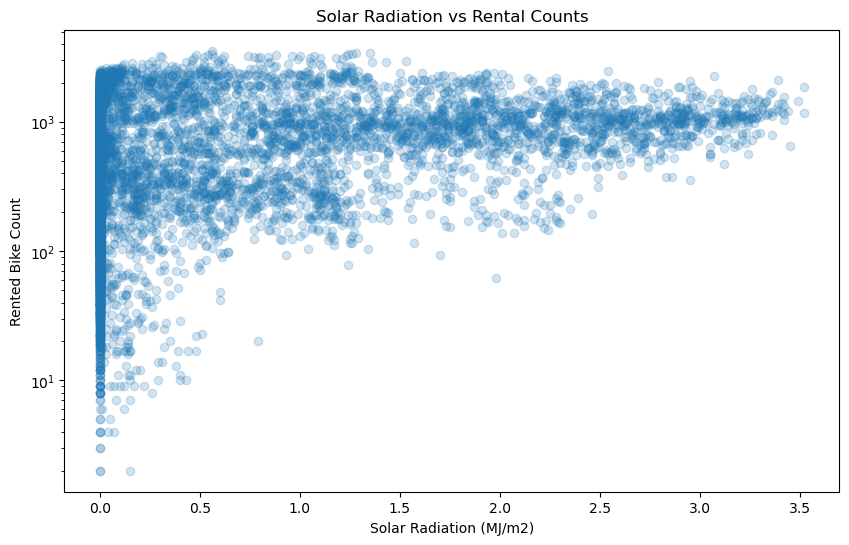

In [174]:
# Solar Radiation
plt.figure(figsize=(10, 6))
plt.scatter(df['Solar Radiation (MJ/m2)'], df['Rented Bike Count'], alpha=0.2)
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.yscale('log')
plt.title('Solar Radiation vs Rental Counts')
plt.show()


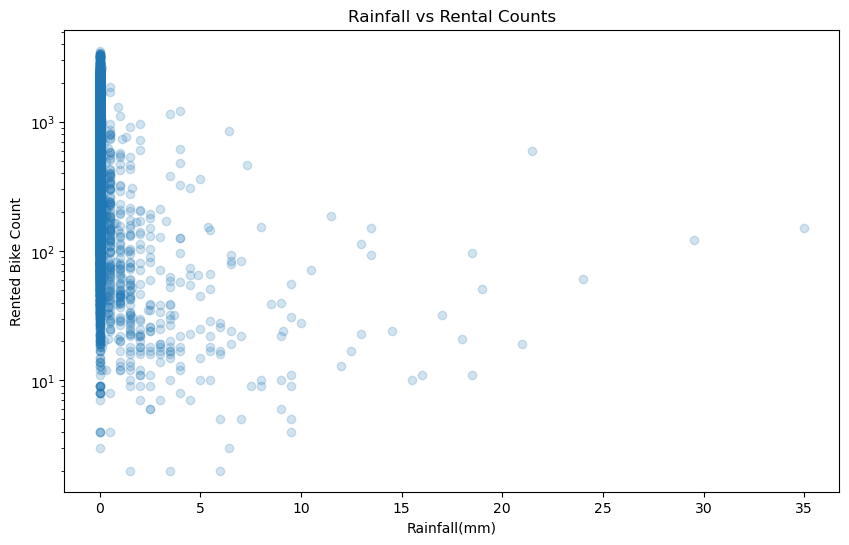

In [175]:
# Rainfall
plt.figure(figsize=(10, 6))
plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'], alpha=0.2)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.yscale('log')
plt.title('Rainfall vs Rental Counts')
plt.show()

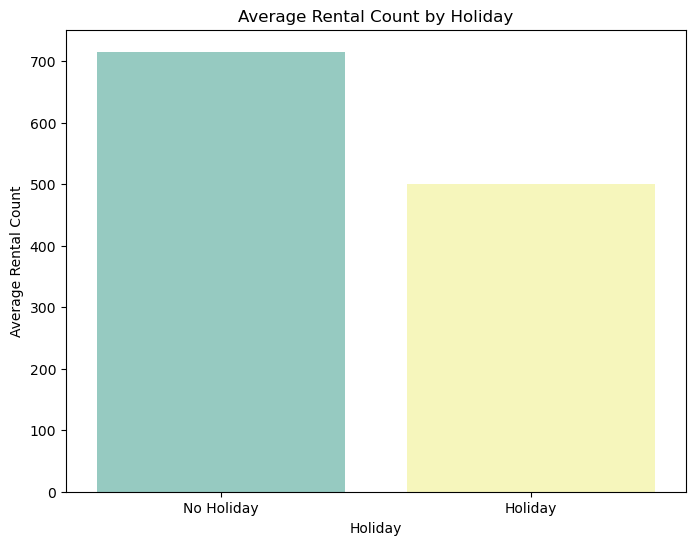

In [157]:
# Holiday
import seaborn as sns
import matplotlib.pyplot as plt
holiday_rental_mean = df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rental_mean, palette='Set3')
plt.title('Average Rental Count by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Rental Count')
plt.xticks(ticks=[0, 1], labels=['No Holiday', 'Holiday'])
plt.show()


# 3. Multiple Regression Model

In [158]:
import statsmodels.api as sm
df['Temp_Holiday_Interact'] = df['Temperature(°C)'] * df['Holiday']
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday','Temp_Holiday_Interact']]
y = df['Rented Bike Count']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# 타겟변수 : Temperature(°C) , Holiday 
# 통제변수 : 나머지 변수들
# 

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     788.4
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:40:34   Log-Likelihood:                -66286.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8749   BIC:                         1.327e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [159]:
import statsmodels.api as sm
df['Hour_Holiday_Interact'] = df['Hour'] * df['Holiday']
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday','Hour_Holiday_Interact']]
y = df['Rented Bike Count']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     789.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:40:34   Log-Likelihood:                -66283.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8749   BIC:                         1.327e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# -----------------------------사용 X --------------------------------------

# 4. RandomForest Model

In [160]:
# Seasons 열 전처리
encoded_seasons = pd.get_dummies(df['Seasons'], prefix='Season')
df = pd.concat([df, encoded_seasons], axis=1)
df = df.drop('Seasons', axis=1)

In [161]:
# Date 열 전처리
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of week'] = df['Date'].dt.dayofweek

In [162]:
# 'Functioning Day' 열의 'Yes'를 1로, 'No'를 0으로 변환
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Holiday                    8760 non-null   int64         
 12  Functi

In [164]:
# RandomForest 모델 사용
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df.drop(['Rented Bike Count', 'Date'], axis = 1)
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test) #정확도
test_mse = mean_squared_error(y_test, y_pred) 
train_preds = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 8178.397329234404
Test MSE: 42676.93335288956


In [165]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error(mae):", mae)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error(rmse):", rmse)

R-squared: 0.8975703378779717
Mean Absolute Error(mae): 122.26306328218452
Root Mean Squared Error(rmse): 206.58396199339762


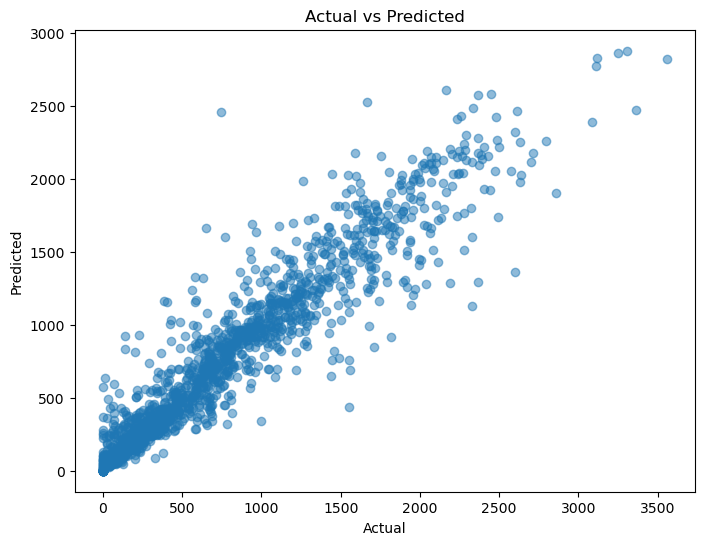

In [166]:
import matplotlib.pyplot as plt

# 예측값과 실제값 비교
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [167]:
# 변수별 중요도
feature_importance = rf_model.feature_importances_
num_features = len(feature_importance)
for i in range(num_features):
    print(f"Feature '{X.columns[i]}': {feature_importance[i]}")

Feature 'Hour': 0.2848394811933173
Feature 'Temperature(°C)': 0.30413215396000204
Feature 'Humidity(%)': 0.06226057475594526
Feature 'Wind speed (m/s)': 0.010265270476252376
Feature 'Visibility (10m)': 0.011296357231408673
Feature 'Dew point temperature(°C)': 0.024376810565030497
Feature 'Solar Radiation (MJ/m2)': 0.08989076847258909
Feature 'Rainfall(mm)': 0.04291144965446293
Feature 'Snowfall (cm)': 0.00039797477490599375
Feature 'Holiday': 0.0008718519877534282
Feature 'Functioning Day': 0.08915502902454106
Feature 'Temp_Holiday_Interact': 0.0014413168172386249
Feature 'Hour_Holiday_Interact': 0.000988212398817578
Feature 'Season_Autumn': 0.01614651050502657
Feature 'Season_Spring': 0.002955137729763737
Feature 'Season_Summer': 0.0016357417275964339
Feature 'Season_Winter': 0.012173531099401124
Feature 'Year': 0.00026231916135146946
Feature 'Month': 0.011169218998801191
Feature 'Day': 0.013318420656155988
Feature 'Day of week': 0.01951186880963877


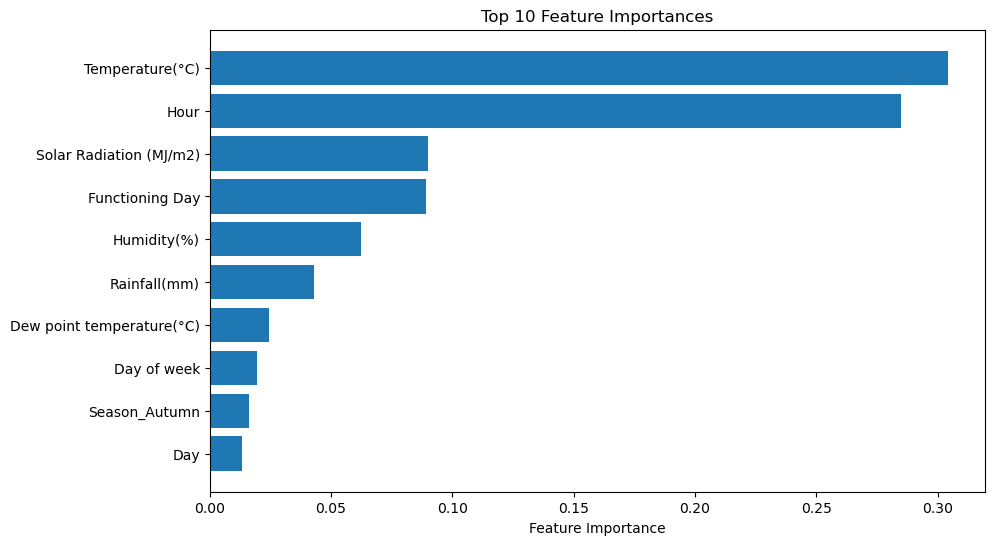

In [168]:
# 높은 중요도를 가진 변수들 top 10
import matplotlib.pyplot as plt
import numpy as np
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)  


top_features = 10
top_idx = sorted_idx[-top_features:] 


plt.figure(figsize=(10, 6))
plt.barh(range(top_features), feature_importance[top_idx], align='center')
plt.yticks(range(top_features), X.columns[top_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()

# 5. Strategic Recommendations Based on Data Analysis

In [169]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Temp_Holiday_Interact,Hour_Holiday_Interact,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Year,Month,Day,Day of week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,-0.0,0,0,0,0,1,2017,1,12,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,-0.0,0,0,0,0,1,2017,1,12,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,-0.0,0,0,0,0,1,2017,1,12,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,-0.0,0,0,0,0,1,2017,1,12,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,-0.0,0,0,0,0,1,2017,1,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,0.0,0,1,0,0,0,2018,11,30,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,0.0,0,1,0,0,0,2018,11,30,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,0.0,0,1,0,0,0,2018,11,30,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,0.0,0,1,0,0,0,2018,11,30,4
